# <span style="color:red"> NUMERICAL EXERCISES 06 </span>

## <span style="color:blue">Exercise 06.1 </span>

###### METROPOLIS/GIBBS SAMPLING FOR 1D ISING MODEL (N=50 SPINS, $J=1$)
Objective: Estimation of total (internal) energy per particle ($U/N$), heat capacity per particle ($C/N$), magnetic susceptibility per particle ($\chi/N$) and magnetization per particle ($m/N$). For the first three: $B=0$, for the last one: $B=0.02$.

The estimations are done at the temperatures $T = (0.5, 0.65, 0.8, 0.95, 1.1, 1.25, 1.4, 1.55, 1.7, 1.85, 2.0)$, after an equilibration time. For each temperature, I used both Metropolis and Gibbs sampling algorithm.

Finally, for each quantity, I plotted its final estimate with error as a function of temperature, and compared with the theoretical value.

###### ANALYTICAL RESOLUTION OF THE 1D ISING MODEL

The 1D Ising model is solved analytically! I am working on a simple model to appreciate how Metropolis works!
It is useful to define here the functions that return the true value of the quanities, in order to use them in the following.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from math import tanh, exp, cosh, sinh, sqrt
import numpy as np

#energy per spin (B=0)
def U(J, N, T):
    beta = 1./T
    th = tanh(beta*J)
    return -J*th*((1+th**(N-2))/(1+th**N))

#heat capacity (B=0)
def C(J, N, T):
    beta = 1./T
    th = tanh(beta*J)
    return ((beta*J)**2) * ((1 + th**N + (N-1)*(th**2) + (N-1)*(th**(N-2)))/(1+th**N) - N*((th+th**(N-1))/(1+th**N))**2 )


#magnetization per spin (for any B)
def m(J, N, B, T):
    b = 1./T
    l1 = exp(b*J)*cosh(b*B) + sqrt(exp(2*b*J)*cosh(b*B)*cosh(b*B)-2*sinh(2*b*J))
    l2 = exp(b*J)*cosh(b*B) - sqrt(exp(2*b*J)*cosh(b*B)*cosh(b*B)-2*sinh(2*b*J))
    Z = l1**N + l2**N
    return (exp(b*J)*sinh(b*B)*((l1**(N-1))*(1+exp(b*J)*cosh(b*B)/sqrt(exp(2*b*J)*cosh(b*B)*cosh(b*B)-2*sinh(2*b*J))) 
        + (l2**(N-1))*(1-exp(b*J)*cosh(b*B)/sqrt(exp(2*b*J)*cosh(b*B)*cosh(b*B)-2*sinh(2*b*J)))))/(Z)

#magnetic suscectivity per spin (B=0)
def chi(J, N, T):
    beta = 1./T
    th = tanh(beta*J)
    return beta * exp(2*beta*J) * ((1-th**N)/(1+th**N))

###### EQUILIBRATION

The system of 50 spins can start from a random initial condition (corresponding to infinite temperature) or from an initial condition of all-aligned spins (corresponding to zero temperature).
Having fixed the temperature and initial configuration, the Metropolis (or Gibbs) algorithm provides a sampling of the probability distribution of the system states, which asymptotically tends to the true distribution (relative to the fixed temperature).
Since there is no information on the rate of convergence, the equilibration time, in which the system evolves to a stable state ("stable" in the sense that the extensional quantities that can be calculated on the system reach an almost constant distribution of probability), must be determined experimentally.

I use the following approach:
1) I fix the temperature;\
2) I choose N=30,000 blocks of one step each, and I temporarily change the code from 50 to only 1 moves per step;\
3) I run 4 simulations: starting with random spin and aligned spin initial conditions (double initial condition to avoid falling into metastable state), both with Metropolis and Gibbs;\
4) I plot graphs of the estimates (NOT progressive) of the four macroscopic quantities of the problem (each graph will contain the 4 simulations);\
5) I estimate the equilibration times by eye.

I evaluate the equilibration time only for two temperatures, the lowest (0.5) and the highest (2.0). Among the equilibration times for the two temperatures, for the two algorithms, for the two initial states, I choose the larger one I find and apply it to all temperatures in the range [0.5, 2.0] before running the measurement simulations.

For both heat capacity and magnetic susceptibility, I made two separate estimates. \
For the heat capacity I added an estimate in which I assume I know $\langle U \rangle$ (given by theoretical value), so that the only parameter to be estimated becomes $\langle U^2 \rangle$. This addition is necessary if I want to consider heat capacity balancing, in fact, if I consider blocks of 1 step each the averages coincide with the individual values, so $\langle U^2 \rangle-\langle U \rangle^2 = (U^2)-(U)^2 = 0$, if I calculate at each step both $U^2$ and $U$. 
For the magnetic susceptibility, the same argument applies, but in reverse: the exercise indicates to assume the theoretical value $\langle m\rangle = 0$ at zero field, for which the estimation of chi reduces to the calculation of $\langle m^2\rangle$. This addition is useless in balancing (it will give only zeros), but it makes sense for measurements, since it makes one less theoretical assumption than the problem text asks for and delegates the task of calculating <m> at zero field to the calculator.

_1) $T = 2.0$_

For a better visualization I plotted only the first 6,000 steps.
For magnetization, because 6,000 did not seem to be enough, I plotted 30,000 (excluding the plot of the data with initial condition spin aligned, again for better visualization).
Because of what was said before, for heat capacity and susceptibility, if I do not assume known theoretical values I have data all =0.

An equilibration time of 50,000 moves seems to be more than sufficient.

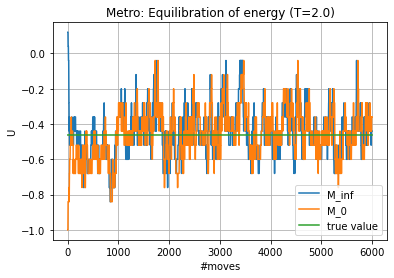

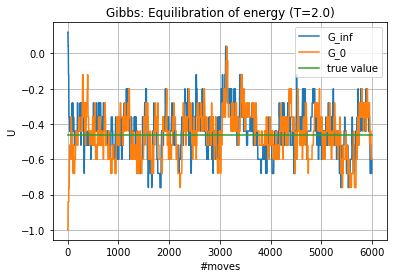

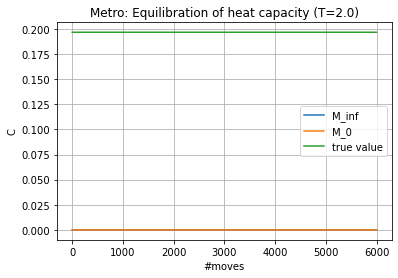

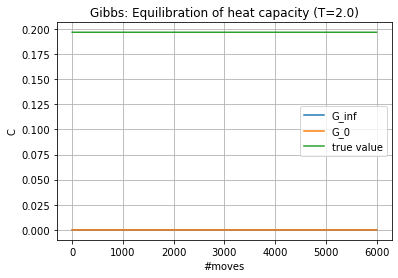

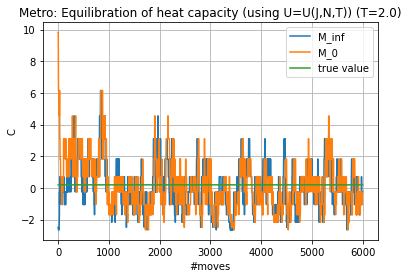

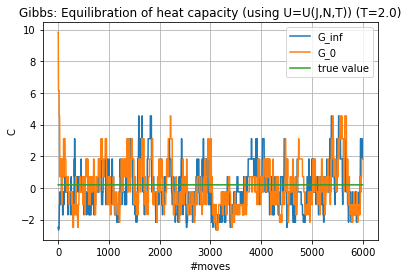

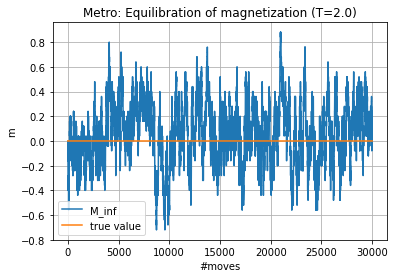

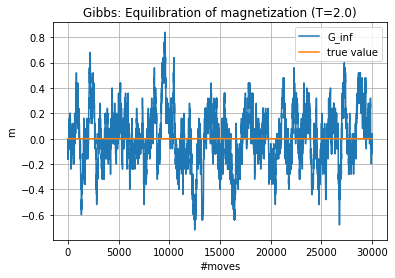

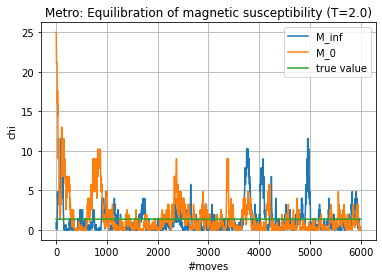

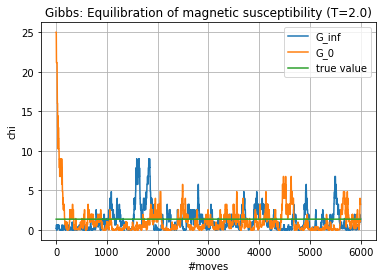

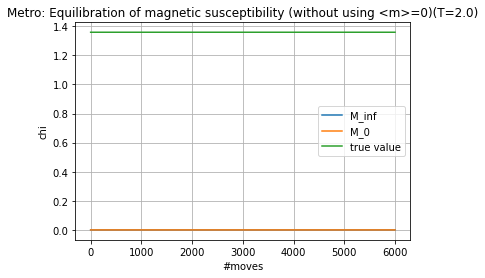

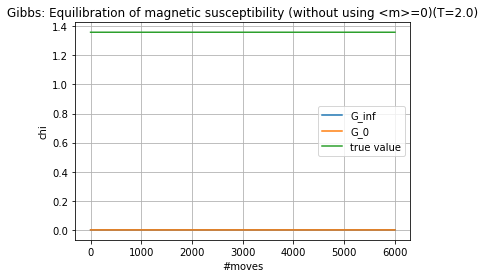

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N = 30000 #num of data
c= 6000 #plotted

Nspin = 50
T = 2.0
J = 1
B = 0.02

x = np.arange(N)
y = np.arange(N)

ext = ['M_inf','M_0','G_inf','G_0'] 
#M_inf: Metropolis, intial random spins
#M_0: Metropolis, intial aligned spins
#G_inf: Gibbs, intial random spins
#G_0: Gibbs, intial aligned spins

# Energy

x, data = np.loadtxt('data/output.ene2.0.dat', usecols =(0,1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*U(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('U')
plt.title('Metro: Equilibration of energy (T=2.0)')
plt.grid(True)
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*U(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('U')
plt.title('Gibbs: Equilibration of energy (T=2.0)')
plt.grid(True)
plt.legend()

# Heat capacity
plt.figure()
x, data = np.loadtxt('data/output.heat2.0.dat', usecols =(0,1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*C(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('C')
plt.title('Metro: Equilibration of heat capacity (T=2.0)')
plt.grid(True)
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*C(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('C')
plt.title('Gibbs: Equilibration of heat capacity (T=2.0)')
plt.grid(True)
plt.legend()
                  
# Heat capacity (estimated with teorical value of U)
plt.figure()                
x, data = np.loadtxt('data/output.2heat2.0.dat', usecols =(0, 1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*C(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('C')
plt.title('Metro: Equilibration of heat capacity (using U=U(J,N,T)) (T=2.0)')
plt.grid(True)
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*C(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('C')
plt.title('Gibbs: Equilibration of heat capacity (using U=U(J,N,T)) (T=2.0)')
plt.grid(True)
plt.legend()

# Magnetization
plt.figure()                
x, data = np.loadtxt('data/output.mag2.0.dat', usecols =(0, 1), unpack = 'true')
x = x[:N]                     
for i in range(1):
    y = data[i*N:i*N+N]
    plt.plot(x,y,label=ext[i])
y = np.ones(N)*m(J,Nspin,0,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('m')
plt.title('Metro: Equilibration of magnetization (T=2.0)')
plt.grid(True) 
plt.legend()

plt.figure()
for i in range(2,3):
    y = data[i*N:i*N+N]
    plt.plot(x,y,label=ext[i])
y = np.ones(N)*m(J,Nspin,0,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('m')
plt.title('Gibbs: Equilibration of magnetization (T=2.0)')
plt.grid(True) 
plt.legend()
                  
# Magnetic susceptibility
plt.figure()                
x, data = np.loadtxt('data/output.chi2.0.dat', usecols =(0, 1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*chi(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('chi')
plt.title('Metro: Equilibration of magnetic susceptibility (T=2.0)')
plt.grid(True)
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*chi(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('chi')
plt.title('Gibbs: Equilibration of magnetic susceptibility (T=2.0)')
plt.grid(True)
plt.legend()
     
# Magnetic susceptibility without using <m>=0
plt.figure()                
x, data = np.loadtxt('data/output.2chi2.0.dat', usecols =(0, 1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*chi(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('chi')
plt.title('Metro: Equilibration of magnetic susceptibility (without using <m>=0)(T=2.0)')
plt.grid(True)
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*chi(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('chi')
plt.title('Gibbs: Equilibration of magnetic susceptibility (without using <m>=0)(T=2.0)')
plt.grid(True)
plt.legend()

plt.show()

_1) $T = 0.5$_

Here the equilibration is different than before (and in a sense easier): if T=0.5, the configuration of the system follows a strongly piqued probability distribution over the state of all aligned spins (because of the low temperature, moves are accepted with low probability, and this can be seen in the graphs below, where the estimated fit deviates from a fixed value only rarely).\
This means that equilibration is complete as soon as the system reaches this state, because the process is Markov and the future does not depend on how I get to that configuration, but only on the configuration itself.
Looking at the graphs, the system gets to that configuration after no more than 15,000 moves, so taking a time of 50,000 moves I can be sure.

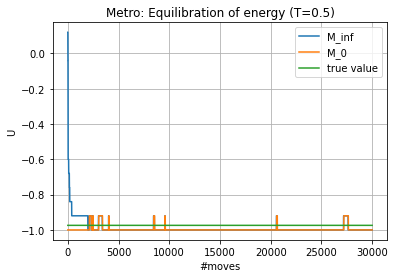

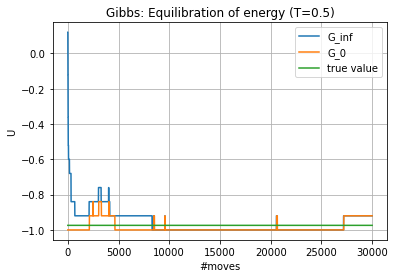

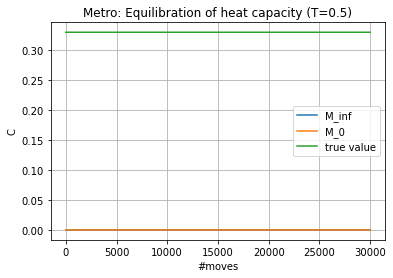

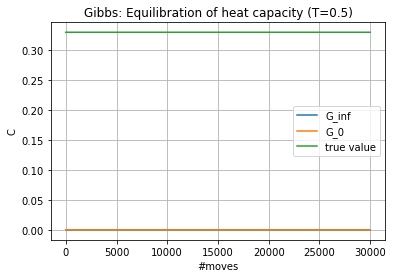

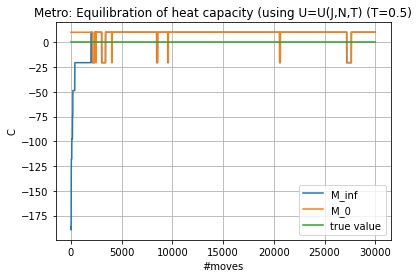

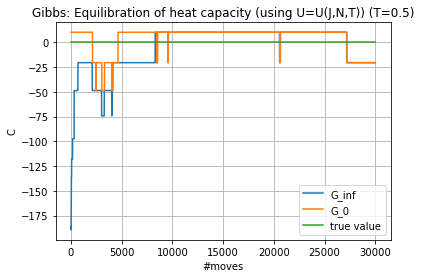

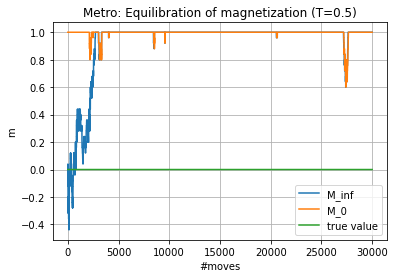

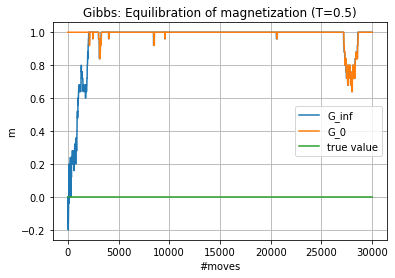

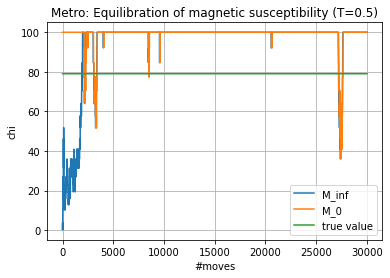

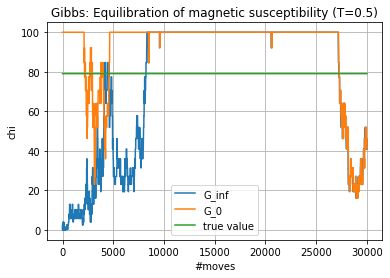

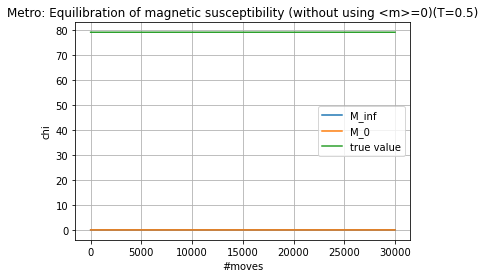

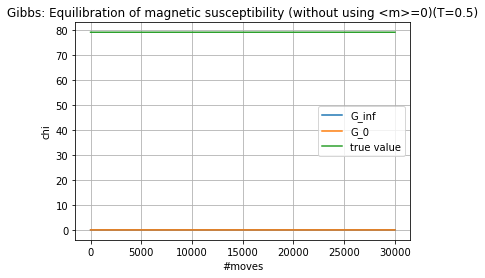

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N = 30000 #num of data
c= 30000 #plotted

Nspin = 50
T = 0.5
J = 1
B = 0.02

x = np.arange(N)
y = np.arange(N)

ext = ['M_inf','M_0','G_inf','G_0'] 
#M_inf: Metropolis, intial random spins
#M_0: Metropolis, intial aligned spins
#G_inf: Gibbs, intial random spins
#G_0: Gibbs, intial aligned spins

# Energy

x, data = np.loadtxt('data/output.ene0.5.dat', usecols =(0,1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*U(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('U')
plt.title('Metro: Equilibration of energy (T=0.5)')
plt.grid(True)
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*U(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('U')
plt.title('Gibbs: Equilibration of energy (T=0.5)')
plt.grid(True)
plt.legend()

# Heat capacity
plt.figure()
x, data = np.loadtxt('data/output.heat0.5.dat', usecols =(0,1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*C(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('C')
plt.title('Metro: Equilibration of heat capacity (T=0.5)')
plt.grid(True)
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*C(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('C')
plt.title('Gibbs: Equilibration of heat capacity (T=0.5)')
plt.grid(True)
plt.legend()
                  
# Heat capacity (estimated with teorical value of U)
plt.figure()                
x, data = np.loadtxt('data/output.2heat0.5.dat', usecols =(0, 1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*C(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('C')
plt.title('Metro: Equilibration of heat capacity (using U=U(J,N,T) (T=0.5)')
plt.grid(True)
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*C(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('C')
plt.title('Gibbs: Equilibration of heat capacity (using U=U(J,N,T)) (T=0.5)')
plt.grid(True)
plt.legend()

# Magnetization
plt.figure()                
x, data = np.loadtxt('data/output.mag0.5.dat', usecols =(0, 1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*m(J,Nspin,0,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('m')
plt.title('Metro: Equilibration of magnetization (T=0.5)')
plt.grid(True) 
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*m(J,Nspin,0,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('m')
plt.title('Gibbs: Equilibration of magnetization (T=0.5)')
plt.grid(True) 
plt.legend()
                  
# Magnetic susceptibility
plt.figure()                
x, data = np.loadtxt('data/output.chi0.5.dat', usecols =(0, 1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*chi(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('chi')
plt.title('Metro: Equilibration of magnetic susceptibility (T=0.5)')
plt.grid(True)
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*chi(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('chi')
plt.title('Gibbs: Equilibration of magnetic susceptibility (T=0.5)')
plt.grid(True)
plt.legend()
     
# Magnetic susceptibility without using <m>=0
plt.figure()                
x, data = np.loadtxt('data/output.2chi0.5.dat', usecols =(0, 1), unpack = 'true')
x = x[:c]                     
for i in range(2):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*chi(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('chi')
plt.title('Metro: Equilibration of magnetic susceptibility (without using <m>=0)(T=0.5)')
plt.grid(True)
plt.legend()

plt.figure()
for i in range(2,4):
    y = data[i*N:i*N+c]
    plt.plot(x,y,label=ext[i])
y = np.ones(c)*chi(J,Nspin,T)
plt.plot(x,y,label='true value')
plt.xlabel('#moves')
plt.ylabel('chi')
plt.title('Gibbs: Equilibration of magnetic susceptibility (without using <m>=0)(T=0.5)')
plt.grid(True)
plt.legend()

plt.show()

###### SIMULATION OF THE MEASUREMENTS

Having found the equilibration time and autocorrelation time of the Metropolis and Gibbs algorithms applied to the considered system at the various tempratures, I can finally begin the simulation of the measurements.



For each temperature, starting from random initial setup:
1) I evolve the system for the equilibration time of 50,000 moves from a random initial configuration;\
2) I start the actual measurement, starting from the configurations reached at equilibrium. I avoid autocorrelation by using data blocking (N=40 blocks of 100,000 steps of 50 moves); \
3) For each quantity, I make a graph where I plot its theoretical trend and, for the 11 chosen temperatures, the final estimates with Metropolis and Gibbs of that quantity with the associated uncertainties. I then check if the estimates found are compatible with the theoretical trend.


A point must be made about the choice to make such long blocks: the block length is 5,000,000 moves, and it is much longer than the balancing time of 50,000 moves (which, moreover, already seemed overestimated).

The choice is due to the behavior of the system for low temperatures (e.g., T=0.5), for which, as noted above, the system deviates from the configuration of all-aligned spins only rarely (by eye once every 5,000/10,000 moves). Now, these deviations from the standard configuration are not just noise, but on the contrary their impact strongly determines the estimation of the measured quantities, so it is necessary to construct blocks with sufficiently large lengths to contain several of these deviations, and thus provide accurate estimates.
(Parallelism. Imagine that I want to estimate the average height of a horse during an obstacle course: if I observe it for less than or about the same distance between two obstacles, my estimate will not be true.)

_1) ENERGY_ \
Because the errors are very small, and you can't see them, I took the 0.8 and 1.7 temperatures and made two graphs where you can get an idea of the agreement between the estimates and the theoretical values. I have made it for all the quantities.

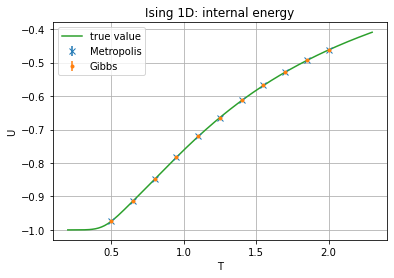

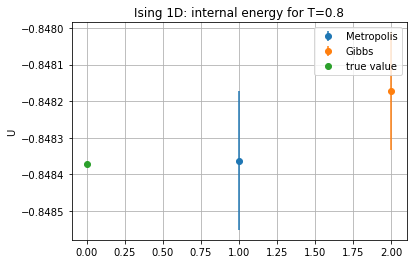

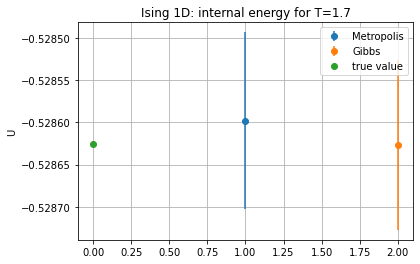

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T = np.arange(0.5, 2.01, 0.15)
J=1
Nspin=50
B=0.02
N=np.size(T)

y, err = np.loadtxt("data/output.ene.dat", usecols =(2,3), unpack = 'true')
y_M = y[:N]
err_M = err[:N]
y_G = y[N:2*N]
err_G = err[N:2*N]
plt.errorbar(T,y_M,err_M, fmt='x',label = 'Metropolis')
plt.errorbar(T,y_G,yerr=err_G, fmt='.', label = 'Gibbs')

points = 200
x = np.linspace(0.2, 2.3, num=points)
y_T = np.ones(points)
for i in range(points):
    y_T[i] = U(J,Nspin,x[i]) 
plt.plot(x,y_T, label = 'true value')

plt.title("Ising 1D: internal energy")
plt.xlabel('T')
plt.ylabel('U')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[2],yerr=err_M[2], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[2],yerr=err_G[2], fmt='o', label = 'Gibbs')
plt.errorbar(0,U(J,Nspin,T[2]), fmt='o', label = 'true value')
plt.title("Ising 1D: internal energy for T=0.8")
plt.ylabel('U')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[8],yerr=err_M[8], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[8],yerr=err_G[8], fmt='o', label = 'Gibbs')
plt.errorbar(0,U(J,Nspin,T[8]), fmt='o', label = 'true value')
plt.title("Ising 1D: internal energy for T=1.7")
plt.ylabel('U')
plt.grid(True)
plt.legend()

plt.show()

_2) HEAT CAPACITY_

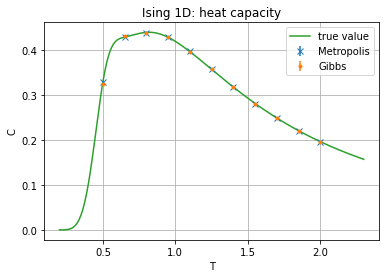

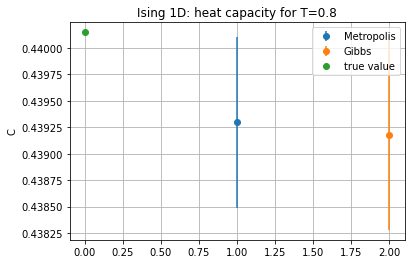

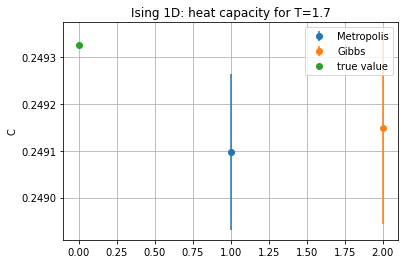

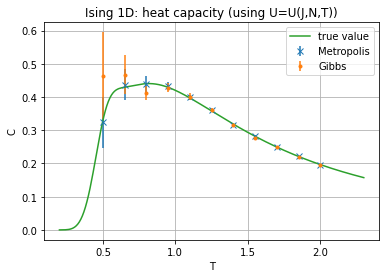

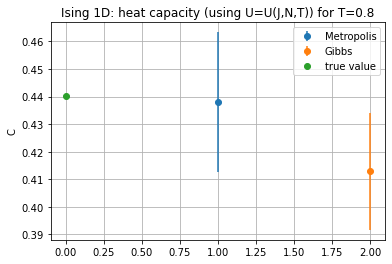

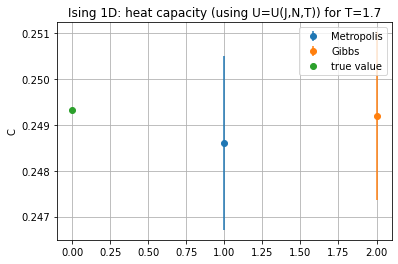

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T = np.arange(0.5, 2.01, 0.15)
J=1
Nspin=50
B=0.02

N=np.size(T)

y, err = np.loadtxt("data/output.heat.dat", usecols =(2,3), unpack = 'true')
y_M = y[:N]
err_M = err[:N]
y_G = y[N:2*N]
err_G = err[N:2*N]
plt.errorbar(T,y_M,yerr=err_M, fmt='x', label = 'Metropolis')
plt.errorbar(T,y_G,yerr=err_G, fmt='.', label = 'Gibbs')

points = 200
x = np.linspace(0.2, 2.3, num=points)
y_T = np.ones(points)
for i in range(points):
    y_T[i] = C(J,Nspin,x[i]) 
plt.plot(x,y_T, label = 'true value')

plt.title("Ising 1D: heat capacity")
plt.xlabel('T')
plt.ylabel('C')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[2],yerr=err_M[2], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[2],yerr=err_G[2], fmt='o', label = 'Gibbs')
plt.errorbar(0,C(J,Nspin,T[2]), fmt='o', label = 'true value')
plt.title("Ising 1D: heat capacity for T=0.8")
plt.ylabel('C')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[8],yerr=err_M[8], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[8],yerr=err_G[8], fmt='o', label = 'Gibbs')
plt.errorbar(0,C(J,Nspin,T[8]), fmt='o', label = 'true value')
plt.title("Ising 1D: heat capacity for T=1.7")
plt.ylabel('C')
plt.grid(True)
plt.legend()


plt.figure()
y, err = np.loadtxt("data/output.2heat.dat", usecols =(2,3), unpack = 'true')
y_M = y[:N]
err_M = err[:N]
y_G = y[N:2*N]
err_G = err[N:2*N]
plt.errorbar(T,y_M,yerr=err_M, fmt='x', label = 'Metropolis')
plt.errorbar(T,y_G,yerr=err_G, fmt='.', label = 'Gibbs')
plt.plot(x,y_T, label = 'true value')
plt.title("Ising 1D: heat capacity (using U=U(J,N,T))")
plt.xlabel('T')
plt.ylabel('C')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[2],yerr=err_M[2], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[2],yerr=err_G[2], fmt='o', label = 'Gibbs')
plt.errorbar(0,C(J,Nspin,T[2]), fmt='o', label = 'true value')
plt.title("Ising 1D: heat capacity (using U=U(J,N,T)) for T=0.8")
plt.ylabel('C')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[8],yerr=err_M[8], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[8],yerr=err_G[8], fmt='o', label = 'Gibbs')
plt.errorbar(0,C(J,Nspin,T[8]), fmt='o', label = 'true value')
plt.title("Ising 1D: heat capacity (using U=U(J,N,T)) for T=1.7")
plt.ylabel('C')
plt.grid(True)
plt.legend()


plt.show()

_3) MAGNETIZATION (B=0)_

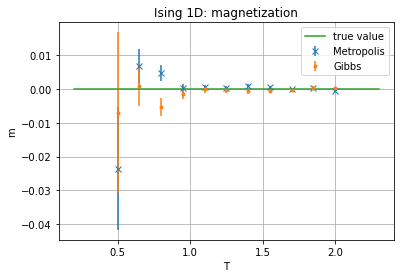

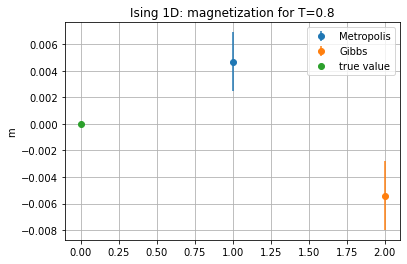

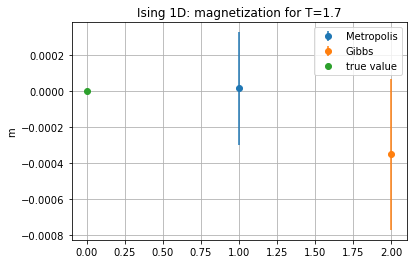

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T = np.arange(0.5, 2.1, 0.15)
J=1
Nspin=50
B=0.0

N=np.size(T)

y, err = np.loadtxt("data/output.mag.dat", usecols =(2,3), unpack = 'true')
y_M = y[:N]
err_M = err[:N]
y_G = y[N:2*N]
err_G = err[N:2*N]
plt.errorbar(T,y_M,yerr=err_M, fmt='x', label = 'Metropolis')
plt.errorbar(T,y_G,yerr=err_G, fmt='.', label = 'Gibbs')

points = 200
x = np.linspace(0.2, 2.3, num=points)
y_T = np.ones(points)
for i in range(points):
    y_T[i] = m(J,Nspin, 0,x[i]) 
plt.plot(x,y_T, label = 'true value')

plt.title("Ising 1D: magnetization")
plt.xlabel('T')
plt.ylabel('m')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[2],yerr=err_M[2], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[2],yerr=err_G[2], fmt='o', label = 'Gibbs')
plt.errorbar(0,m(J,Nspin,B, T[2]), fmt='o', label = 'true value')
plt.title("Ising 1D: magnetization for T=0.8")
plt.ylabel('m')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[8],yerr=err_M[8], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[8],yerr=err_G[8], fmt='o', label = 'Gibbs')
plt.errorbar(0,m(J,Nspin, B, T[8]), fmt='o', label = 'true value')
plt.title("Ising 1D: magnetization for T=1.7")
plt.ylabel('m')
plt.grid(True)
plt.legend()


plt.show()

_3) MAGNETIZATION (B=0.02)_

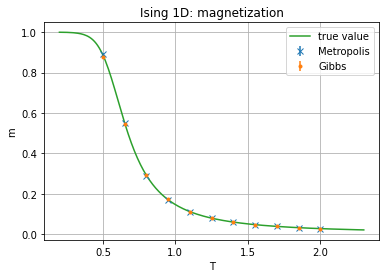

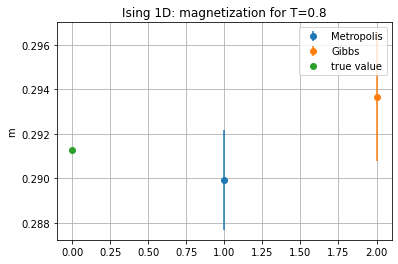

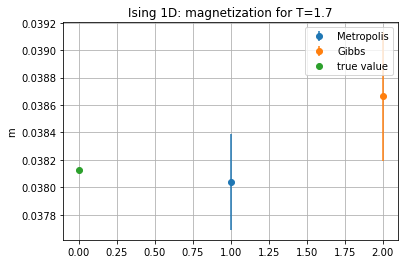

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T = np.arange(0.5, 2.1, 0.15)
J=1
Nspin=50
B=0.02

N=np.size(T)

y, err = np.loadtxt("data/output.magB.dat", usecols =(2,3), unpack = 'true')
y_M = y[:N]
err_M = err[:N]
y_G = y[N:2*N]
err_G = err[N:2*N]
plt.errorbar(T,y_M,yerr=err_M, fmt='x', label = 'Metropolis')
plt.errorbar(T,y_G,yerr=err_G, fmt='.', label = 'Gibbs')

points = 200
x = np.linspace(0.2, 2.3, num=points)
y_T = np.ones(points)
for i in range(points):
    y_T[i] = m(J,Nspin, B,x[i]) 
plt.plot(x,y_T, label = 'true value')

plt.title("Ising 1D: magnetization")
plt.xlabel('T')
plt.ylabel('m')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[2],yerr=err_M[2], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[2],yerr=err_G[2], fmt='o', label = 'Gibbs')
plt.errorbar(0,m(J,Nspin,B, T[2]), fmt='o', label = 'true value')
plt.title("Ising 1D: magnetization for T=0.8")
plt.ylabel('m')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[8],yerr=err_M[8], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[8],yerr=err_G[8], fmt='o', label = 'Gibbs')
plt.errorbar(0,m(J,Nspin, B, T[8]), fmt='o', label = 'true value')
plt.title("Ising 1D: magnetization for T=1.7")
plt.ylabel('m')
plt.grid(True)
plt.legend()


plt.show()

_4) MAGNETIC SUSCEPTIBILITY_

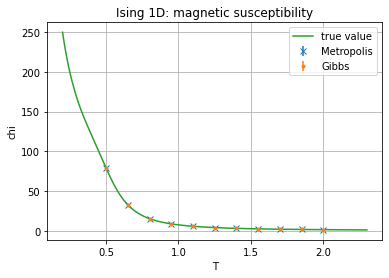

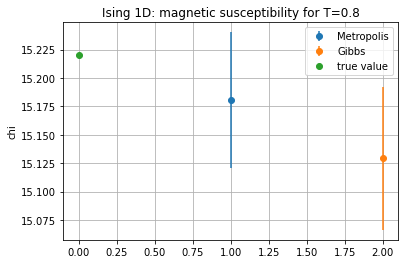

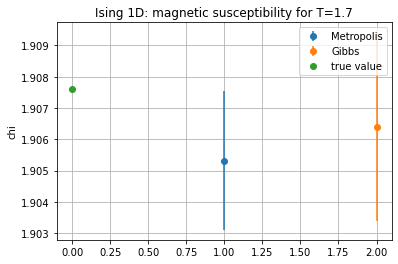

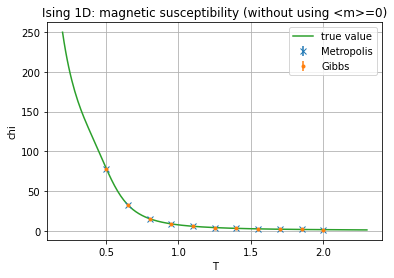

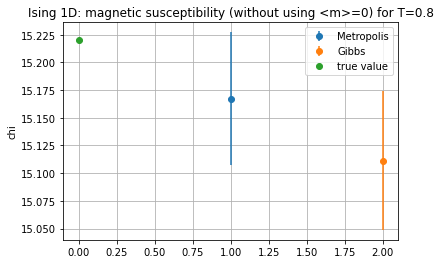

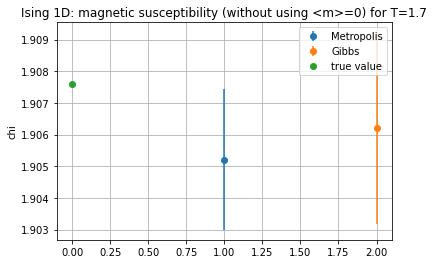

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T = np.arange(0.5, 2.01, 0.15)
J=1
Nspin=50
B=0.02

N=np.size(T)

y, err = np.loadtxt("data/output.chi.dat", usecols =(2,3), unpack = 'true')
y_M = y[:N]
err_M = err[:N]
y_G = y[N:2*N]
err_G = err[N:2*N]
plt.errorbar(T,y_M,yerr=err_M, fmt='x', label = 'Metropolis')
plt.errorbar(T,y_G,yerr=err_G, fmt='.', label = 'Gibbs')

points = 200
x = np.linspace(0.2, 2.3, num=points)
y_T = np.ones(points)
for i in range(points):
    y_T[i] = chi(J,Nspin,x[i]) 
plt.plot(x,y_T, label = 'true value')

plt.title("Ising 1D: magnetic susceptibility")
plt.xlabel('T')
plt.ylabel('chi')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[2],yerr=err_M[2], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[2],yerr=err_G[2], fmt='o', label = 'Gibbs')
plt.errorbar(0,chi(J,Nspin, T[2]), fmt='o', label = 'true value')
plt.title("Ising 1D: magnetic susceptibility for T=0.8")
plt.ylabel('chi')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[8],yerr=err_M[8], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[8],yerr=err_G[8], fmt='o', label = 'Gibbs')
plt.errorbar(0,chi(J,Nspin, T[8]), fmt='o', label = 'true value')
plt.title("Ising 1D: magnetic susceptibility for T=1.7")
plt.ylabel('chi')
plt.grid(True)
plt.legend()

plt.figure()
y, err = np.loadtxt("data/output.2chi.dat", usecols =(2,3), unpack = 'true')
y_M = y[:N]
err_M = err[:N]
y_G = y[N:2*N]
err_G = err[N:2*N]
plt.errorbar(T,y_M,yerr=err_M, fmt='x', label = 'Metropolis')
plt.errorbar(T,y_G,yerr=err_G, fmt='.', label = 'Gibbs')
plt.plot(x,y_T, label = 'true value')
plt.title("Ising 1D: magnetic susceptibility (without using <m>=0)")
plt.xlabel('T')
plt.ylabel('chi')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[2],yerr=err_M[2], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[2],yerr=err_G[2], fmt='o', label = 'Gibbs')
plt.errorbar(0,chi(J,Nspin, T[2]), fmt='o', label = 'true value')
plt.title("Ising 1D: magnetic susceptibility (without using <m>=0) for T=0.8")
plt.ylabel('chi')
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(1,y_M[8],yerr=err_M[8], fmt='o', label = 'Metropolis')
plt.errorbar(2,y_G[8],yerr=err_G[8], fmt='o', label = 'Gibbs')
plt.errorbar(0,chi(J,Nspin, T[8]), fmt='o', label = 'true value')
plt.title("Ising 1D: magnetic susceptibility (without using <m>=0) for T=1.7")
plt.ylabel('chi')
plt.grid(True)
plt.legend()

plt.show()

###### CONCLUSIONS

1) The estimations made for the 11 temperatures considered are compatible, within their uncertainties, with the theoretical values given by the analytical resolution of the 1D Ising model, and the agreement is formidable: Metropolis works! \
2) For the heat capacity and the magnetic susceptibility, for which I added the alternative implementation, I made two separate graphs, but, at least for the higher temperatures, there is not a big difference. \
3) For the magnetization, I made two estimations: one with B=0, the other with B=0.02. The first one is useful to verify <m>=0, in absence of B. 